<a href="https://colab.research.google.com/github/Gabriel-git24/titanic-survival-prediction/blob/main/titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_data = '/content/drive/MyDrive/titanic/train.csv'
test_data = '/content/drive/MyDrive/titanic/test.csv'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



df_train = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# looks like age and cabin as missing columns
# let's drop columns we don't need

df_train.columns = df_train.columns.str.lower()

df_train = df_train.drop(columns=['name', 'cabin', 'ticket', 'passengerid'])

df_train

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
# splitting training and validation set

X = df_train.drop(columns=['survived'])
y = df_train['survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42, shuffle=True)

In [7]:
ohe = OneHotEncoder(sparse_output=False)

sex_column = X_train[['sex']]

ohe.fit(sex_column)

sex_encoded = ohe.transform(sex_column)
sex_encoded

df_sex = pd.DataFrame(
    sex_encoded,
    columns=ohe.categories_,
    index=X_train.index)

In [8]:
df_sex

,female,male
331,0.0,1.0
733,0.0,1.0
382,0.0,1.0
704,0.0,1.0
813,1.0,0.0
...,...,...
106,1.0,0.0
270,0.0,1.0
860,0.0,1.0
435,1.0,0.0


In [9]:
imputer = SimpleImputer(strategy='mean')

age_column = X_train[['age']]
imputer.fit(age_column)

imputed_age = imputer.transform(age_column)

X_train['age'] = imputed_age.round(2)

In [10]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S
...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S
270,1,male,29.5,0,0,31.0000,S
860,3,male,41.0,2,0,14.1083,S
435,1,female,14.0,1,2,120.0000,S


In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    712 non-null    int64  
 1   sex       712 non-null    object 
 2   age       712 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
 6   embarked  710 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [12]:
X_train['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
cat_imputer = SimpleImputer(strategy='most_frequent')

embarked_column = X_train[['embarked']]
cat_imputer.fit(embarked_column)

imp_embarked = cat_imputer.transform(embarked_column)

X_train['embarked'] = imp_embarked[:, 0]

In [14]:
X_train['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    712 non-null    int64  
 1   sex       712 non-null    object 
 2   age       712 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
 6   embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [16]:
# hotencoding embarked

ohe_embarked = OneHotEncoder(sparse_output=False)

embarked_ohe = X_train[['embarked']]

ohe_embarked.fit(embarked_ohe)

embarked_encoded = ohe_embarked.transform(embarked_ohe)


# making a dataframe for this encoded
embarked_columns = ohe_embarked.get_feature_names_out()

df_embarked = pd.DataFrame(
    embarked_encoded,
    columns=embarked_columns,
    index=X_train.index
)

df_final_train = pd.concat([
    X_train,
    df_sex,
    df_embarked
], axis=1) #added axis=1 to concatenate columnwise !!

df_final_train

,pclass,sex,age,sibsp,parch,fare,embarked,"(female,)","(male,)",embarked_C,embarked_Q,embarked_S
331,1,male,45.5,0,0,28.5000,S,0.0,1.0,0.0,0.0,1.0
733,2,male,23.0,0,0,13.0000,S,0.0,1.0,0.0,0.0,1.0
382,3,male,32.0,0,0,7.9250,S,0.0,1.0,0.0,0.0,1.0
704,3,male,26.0,1,0,7.8542,S,0.0,1.0,0.0,0.0,1.0
813,3,female,6.0,4,2,31.2750,S,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S,1.0,0.0,0.0,0.0,1.0
270,1,male,29.5,0,0,31.0000,S,0.0,1.0,0.0,0.0,1.0
860,3,male,41.0,2,0,14.1083,S,0.0,1.0,0.0,0.0,1.0
435,1,female,14.0,1,2,120.0000,S,1.0,0.0,0.0,0.0,1.0


In [17]:
# dropping sex and embarked columns

df_final_train = df_final_train.drop(columns=['sex', 'embarked'])
df_final_train = df_final_train.rename(columns={('female',):'female', ('male',):'male'})
df_final_train['fare'] = df_final_train['fare'].round(2)

df_final_train

,pclass,age,sibsp,parch,fare,female,male,embarked_C,embarked_Q,embarked_S
331,1,45.5,0,0,28.50,0.0,1.0,0.0,0.0,1.0
733,2,23.0,0,0,13.00,0.0,1.0,0.0,0.0,1.0
382,3,32.0,0,0,7.92,0.0,1.0,0.0,0.0,1.0
704,3,26.0,1,0,7.85,0.0,1.0,0.0,0.0,1.0
813,3,6.0,4,2,31.28,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.65,1.0,0.0,0.0,0.0,1.0
270,1,29.5,0,0,31.00,0.0,1.0,0.0,0.0,1.0
860,3,41.0,2,0,14.11,0.0,1.0,0.0,0.0,1.0
435,1,14.0,1,2,120.00,1.0,0.0,0.0,0.0,1.0


<Axes: >

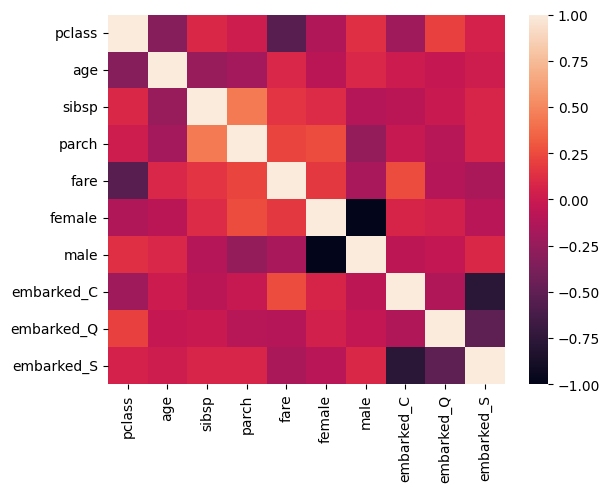

In [18]:
corr_matrix = df_final_train.corr()

sns.heatmap(corr_matrix)

In [19]:
df_final_train['male'].describe()

,male
count,712.000000
mean,0.655899
std,0.475408
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


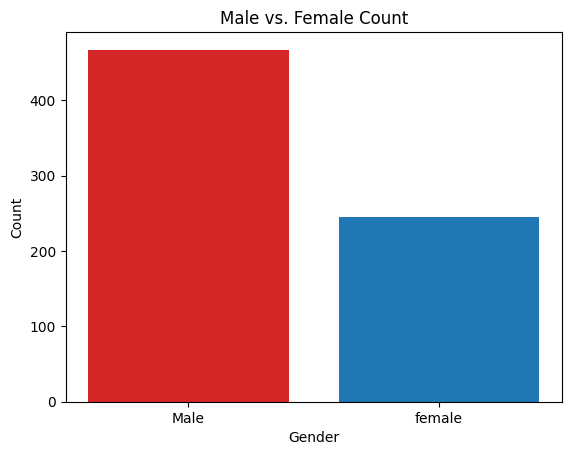

In [20]:
fig, ax = plt.subplots()

males =  df_final_train['male'].sum()
females = df_final_train['female'].sum()
bar_colors = ['tab:red', 'tab:blue']
bar_labels = ['Male', 'female']
bar_values = [males, females]

ax.bar(bar_labels, bar_values, color=bar_colors);
ax.set_title('Male vs. Female Count')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')


plt.show()

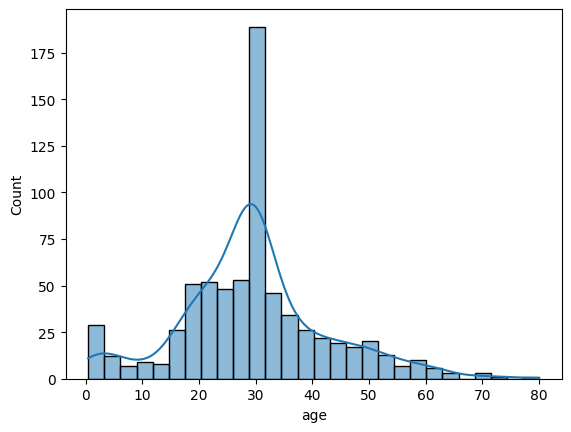

In [21]:
mean_age = df_final_train['age'].mean()
std_age = df_final_train['age'].std()
median_age = df_final_train['age'].median()

age_data = df_final_train['age']

sns.histplot(age_data, kde=True)
plt.show()

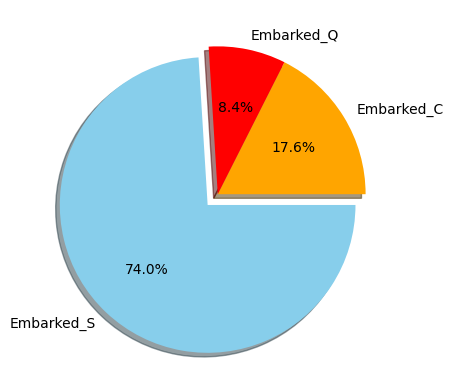

In [47]:
# embarked percentage

c = df_final_train['embarked_C'].sum()
q = df_final_train['embarked_Q'].sum()
s = df_final_train['embarked_S'].sum()

sizes = [c, q, s]
labels = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

explode = (0,0,0.1)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['orange', 'red', 'skyblue'], explode=explode, shadow=True)
plt.show();

In [50]:
average_fair = df_final_train['fare'].mean()
median_fair = df_final_train['fare'].median()
std_of_fair = df_final_train['fare'].std()

print(f'The average fair on the titanic was: ${average_fair:.2f}')
print(f'The median fair on the titanic was: ${median_fair:.2f}')
print(f'The standard deviation of the fair on the titanic was: {std_of_fair:.2f}')

#build an inflation calculator??

The average fair on the titanic was: $32.59
The median fair on the titanic was: $14.45
The standard deviation of the fair on the titanic was: 51.97


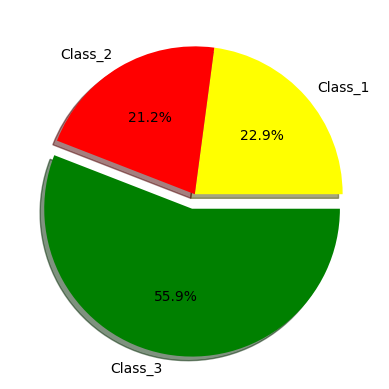

In [68]:
count_of_class_1 = (df_final_train['pclass'] == 1).sum()
count_of_class_2 = (df_final_train['pclass'] == 2).sum()
count_of_class_3 = (df_final_train['pclass'] == 3).sum()

sum = df_final_train['pclass'].sum()

sizes = [count_of_class_1, count_of_class_2, count_of_class_3]
labels = ['Class_1', 'Class_2', 'Class_3']

explode = (0,0,0.1)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['yellow', 'red', 'green'], explode=explode, shadow=True)
plt.show();

